In [1]:
#include "xvega/xvega.hpp"

In [2]:
using namespace xv;

In [3]:
dataFrame df;
df["project"] = {"a", "a", "a", "d", "e", "f", "g"};
df["score"]= {25, 57, 23, 19, 8, 47, 8};
df["goal"] = {25, 47, 30, 27, 38, 19, 4};
df["origin"] = {34, 23, 35, 21, 17, 26, 34};
df["country"] = {"India", "France", "France", "Germany", "India", "Germany", "France"};
df["feedback"] = {"good", "bad", "bad", "neutral", "good", "neutral", "bad"};
df["url"] = {"https://www.google.com/search?q=India", "https://www.google.com/search?q=France", "https://www.google.com/search?q=France", "https://www.google.com/search?q=Germany", "https://www.google.com/search?q=India", "https://www.google.com/search?q=Germany", "https://www.google.com/search?q=France"};

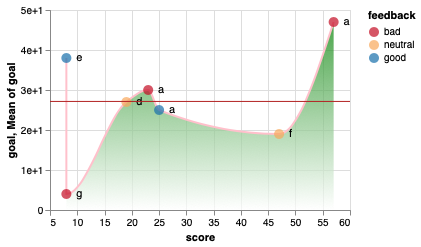

In [4]:
auto ax = Axis().format(std::string(".1"));

auto x_enc = X().field("score").type("quantitative");
auto y_enc = Y().field("goal").type("quantitative").axis(ax);

auto s = {"bad", "neutral", "good"};
auto c = {"#c30d24", "#f8a95c", "#1770ab"};
auto scale_option = Scale().domain(s).range(c);

auto color_enc = Color().field("feedback").type("nominal").scale(scale_option);
auto row_enc = Row().field("feedback").type("nominal");
auto size_enc = Size().field("origin").type("quantitative");

auto tooltip_enc_1 = Tooltip().field("origin").type("quantitative");
auto tooltip_enc_2 = Tooltip().field("country").type("nominal");
auto t = {tooltip_enc_1, tooltip_enc_2};

auto text_enc = Text().field("project").type("nominal");

auto rule_enc = Y().field("goal").type("quantitative").aggregate("mean");

auto href_enc = Href().field("url").type("nominal");

auto enc = Encodings().x(x_enc).y(y_enc).color(color_enc).tooltip(t).href(href_enc);
auto enc_2 = Encodings().text(text_enc).x(x_enc).y(y_enc);
auto enc_3 = Encodings().y(rule_enc);
auto enc_4 = Encodings().x(x_enc).y(y_enc);

auto stop_1 = GradientStop().color("white").offset(0);
auto stop_2 = GradientStop().color("green").offset(1);
auto grad = LinearGradient().stops({stop_1, stop_2}).x1(1).y1(1);

nl::json lineProp;
lineProp["color"] = "pink";

auto mc = Marks().type("circle").size(100);
auto mt = Marks().type("text").align("left").baseline("middle").dx(10);
auto mr = Marks().type("rule").color("firebrick");
auto ma = Marks().type("area").line(lineProp).color(grad).interpolate("monotone");

auto fig = Chart().data(df).marks({ma, mc, mt, mr}).encodings({enc_4, enc, enc_2, enc_3}).width(300);
fig